# Part I - (Barcelona Traffic Accidents Exploration Title)
## by Andric Ishami

## Introduction
> This dataset is a dataset provided publicly by the authorities of the city of Barcelona; It consists of yearly observations of accidents that took place in Barcelona from 2010 to 2021.

> Variables that were recorded are the time of the accident, number of cars or vitctims involved, the number of deaths or wounded, the place of accident and the cause.


 
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
accidents = pd.read_csv("accidents_opendata.csv")
accidents.head()

C:\Users\isham\AppData\Local\Temp\ipykernel_6148\1738682023.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("accidents_opendata.csv")


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,...,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,...,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,-1,-1,NaN,NaN
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,...,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16",NaN,NaN
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,...,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65",NaN,NaN
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45",NaN,NaN
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,...,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84",NaN,NaN


In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110655 entries, 0 to 110654
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   case_id            110655 non-null  object 
 1   district_id        110654 non-null  float64
 2   district_name      110654 non-null  object 
 3   neighborhood_id    110654 non-null  object 
 4   neighborhood_name  110654 non-null  object 
 5   street_code        110654 non-null  float64
 6   street_name        110653 non-null  object 
 7   postal_code        105851 non-null  object 
 8   weekday_name       110655 non-null  object 
 9   weekday            102995 non-null  object 
 10  type_day           102995 non-null  object 
 11  year               110654 non-null  float64
 12  month              110654 non-null  float64
 13  month_name         110654 non-null  object 
 14  day                110654 non-null  float64
 15  hour               110654 non-null  float64
 16  cy

In [4]:
accidents.describe()

,district_id,street_code,year,month,day,hour,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,longitude,latitude
count,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,110654.000000,54345.000000,54345.000000
mean,4.813563,238669.737886,2015.371166,6.540089,15.759765,13.819302,0.002612,1.158964,0.023695,1.185271,1.915023,3.350592,60.405022
std,2.988493,190947.366687,3.316393,3.476227,8.748838,5.289038,0.052780,0.772026,0.162776,0.766085,0.729919,50.594181,886.553616
min,-1.000000,-1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.488576,0.000009
25%,2.000000,112900.000000,2013.000000,3.250000,8.000000,10.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.145108,41.385786
50%,4.000000,187207.000000,2015.000000,6.000000,16.000000,14.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.163498,41.397152
75%,7.000000,312400.000000,2018.000000,10.000000,23.000000,18.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.180154,41.411468
max,10.000000,701869.000000,2021.000000,12.000000,31.000000,23.000000,3.000000,25.000000,4.000000,26.000000,18.000000,2189.000000,41414.000000


### What is the structure of your dataset?

> This dataset includes 13 numeric variables and 14 string objects/categorical variables. 

> Although there are many numerical variables in this dataset, only 4 of them are usable for analysis; those are: n_deaths, n_vehicles, n_victims, n_wounded_severe and n_wounded_mild.

> There's only one ordinal variable: cyrcadian (with day, evening and night as unique values). The rest of categorical variables are nominal.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest here are: n_deaths, n_victims, n_wounded_severe, n_wounded_mild.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that "cyrcadian" and other variables of time ("day", "month" and "year") will help me understand and investigate deeply my features of interest.

## Univariate Exploration

I will start by investigating in what month does most of the accidents in Barcelona occur.

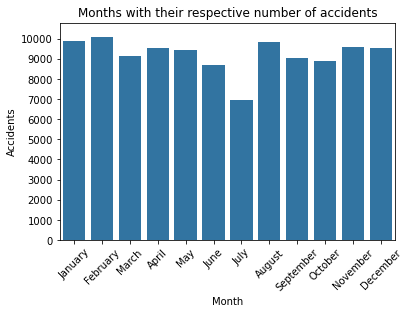

In [5]:
color=sb.color_palette()[0]
ticks=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=accidents, x='month_name', color=color)
plt.xticks(ticks= np.arange(0,12,1), labels=ticks ,rotation=45)
plt.ylim(0,10800)
plt.yticks(np.arange(0,10100, 1000))
plt.title("Months with their respective number of accidents")
plt.xlabel("Month")
plt.ylabel("Accidents");

The end and the start of the year seems to be the most represented in this dataset, with the month of February being the one with the most accidents.

Now, what year did most accidents occur in?

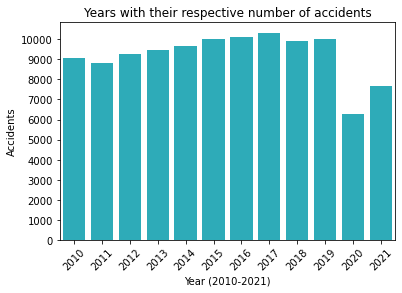

In [6]:
color=sb.color_palette()[9]
labels=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,2021]
sb.countplot(data=accidents, x='year', color=color)
plt.xticks(ticks= np.arange(0,12,1), labels=labels ,rotation=45)
plt.yticks(np.arange(0,10100, 1000))
plt.title("Years with their respective number of accidents")
plt.xlabel("Year (2010-2021)")
plt.ylabel("Accidents");

It seems to be the case that there was a certain (almost) constant growth in accidents in Barcelona from 2010 to 2019, and then a fall and again a rise from 2020 to 2021. 
>That fall at the end might be due to the fact maybe that we were in the Covid 19 pandemic or maybe that the authorities took charge and changed things a little.

How many cars are there during an accident?

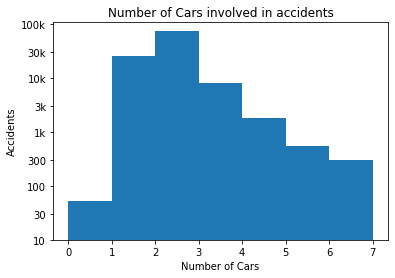

In [7]:
bins= np.arange(0,8,1)
plt.hist(data=accidents, x='n_vehicles', bins=bins)
plt.yscale("log")
plt.xticks(np.arange(0,8,1))
plt.title("Number of Cars involved in accidents")
plt.xlabel("Number of Cars")
plt.ylabel("Accidents")
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels=["10", "30","100","300","1k","3k","10k", "30k", "100k"]
ax = plt.gca()
ax.set(yticks = ticks, yticklabels = labels)
plt.minorticks_off();

As I would expect, it takes generally two cars (or more) to make an accident. But, There are also a considerable number of accidents with just a car involved; such as hitting someone passing by. I will investigate more on this later.  

In [8]:
#Wrangling
print(accidents.cyrcadian.unique())
#Dropping the unusual row 
accidents= accidents.drop([10008])
print(accidents.cyrcadian.unique())

['Matí' 'Tarda' 'Nit' '13:25:52']
['Matí' 'Tarda' 'Nit']


At what time of the day do most accidents occur?

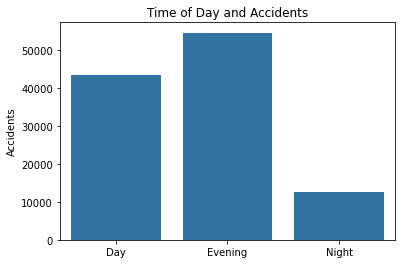

In [9]:
cat= ['Matí', 'Tarda', 'Nit']
cl= pd.api.types.CategoricalDtype(categories=cat, ordered=True)
accidents["cyrcadian"] = accidents.cyrcadian.astype(cl)
color=sb.color_palette()[0]
sb.countplot(data=accidents, x='cyrcadian', color=color)
plt.xticks(np.arange(0,3,1),["Day","Evening","Night"])
plt.ylabel("Accidents")
plt.xlabel("")
plt.title("Time of Day and Accidents");

Surprisingly most accidents in Barcelona do not occur at night, but during the evening/ the afternoon. Is it always the case even during sunny season such as during Summer? I will explore more on that later.

In [10]:
accidents["season"]= pd.cut(x=accidents.month, bins=[1,2,4,8,11,12], labels=["Winter","Spring","Summer","Fall","Winter"], ordered=False)

Now, what time season represents the most danger?

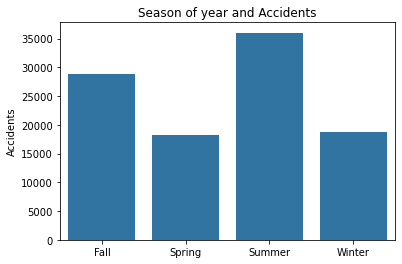

In [11]:
color=sb.color_palette()[0]
sb.countplot(data=accidents, x='season', color=color)
plt.ylabel("Accidents")
plt.xlabel("")
plt.title("Season of year and Accidents");

Rather unsurprisingly, Summer packs in most of the accidents.
>Parties, tourists, and heat are catalyst of trouble; even for a tourist-friendly city as Barcelona

How about precise time now, at what hour does most accidents occuring in?

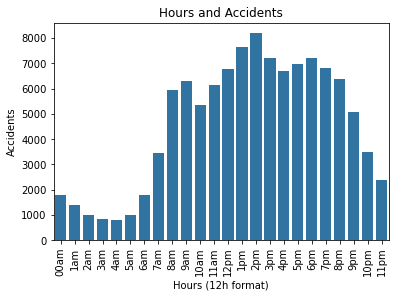

In [12]:
color=sb.color_palette()[0]
sb.countplot(data=accidents, x='hour', color=color)
plt.xticks(np.arange(0,24,1), ["00am",  "1am",  "2am",  "3am",  "4am",  "5am",  "6am",  "7am",  "8am",  "9am", "10am", "11am", "12pm",  "1pm",  "2pm",  "3pm",  "4pm",  "5pm",  "6pm",  "7pm",  "8pm",  "9pm", "10pm", "11pm"], rotation=90)
plt.xlabel("Hours (12h format)")
plt.ylabel("Accidents")
plt.title("Hours and Accidents");

There's a clear pattern here; from midnight up to 7 am, the streets are fairly calm. But then as people rise and go to work, trouble kicks in; with (as we saw earlier) the afternoon (1pm to 3pm) and early evening (5pm to 7pm).

What about the number of deaths,victims and wounded? How are they distributed?

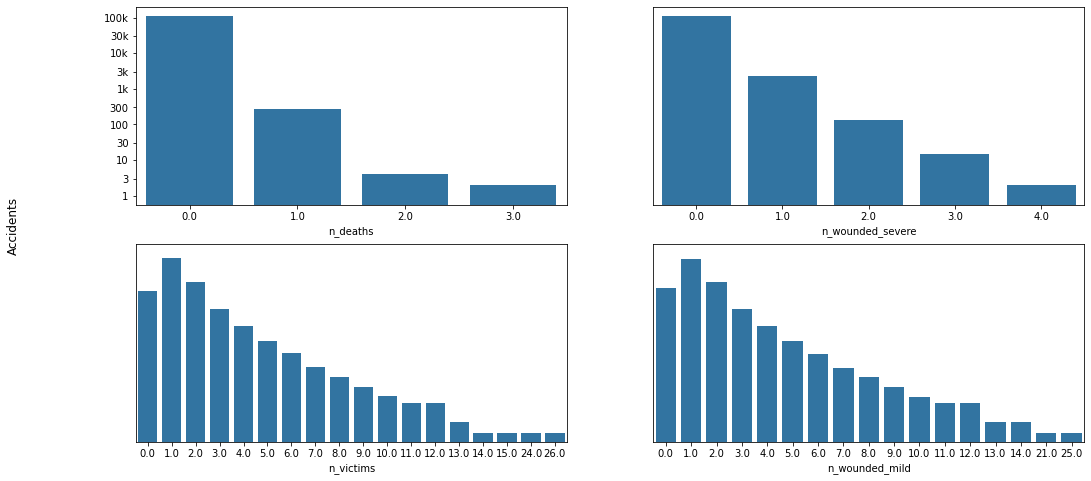

In [13]:
fig,((ax1, ax2), (ax3, ax4)) =plt.subplots(2,2, figsize=(17,8), sharex=False, sharey=True)
sb.countplot(data=accidents, x='n_deaths', color=color, ax=ax1)
plt.yscale("log")
ax1.set_ylabel(" ")
sb.countplot(data=accidents, x='n_wounded_severe', color=color, ax=ax2)
ax2.set_ylabel(" ")
ax2.axes.yaxis.set_visible(False)
sb.countplot(data=accidents, x='n_victims', color=color, ax=ax3)
ax3.set_ylabel(" ")
ax3.axes.yaxis.set_visible(False)
sb.countplot(data=accidents, x='n_wounded_mild', color=color, ax=ax4)
ax4.set_ylabel(" ")
ax4.axes.yaxis.set_visible(False)
fig.supylabel("Accidents")
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000,30000,100000]
labels=["1", "3","10", "30","100","300","1k","3k","10k", "30k","100k"]
ax1.set(yticks = ticks, yticklabels = labels)
plt.minorticks_off();

The range of deaths and severely wounded people are evenly distributed to a small range of up to 4, with 0 being the most common as we wouldn't have a dead or severely wounded person on every accident.

But with the number of victims and mildly wounded, the range gets bigger; There were some accidents with over 20 victims and/or 20 mildly wounded people. These are outliers, but I don't think they are to be removed from the dataset as they have an importance.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variables of interest are mostly of categorical nature and they seem to be distributed fairly evenly, I didn't need to do any transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, this dataset has no unusual distribution; It was also provided in a tidy form, I didn't need to change its form.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [14]:
accidents.corr()

,district_id,street_code,year,month,day,hour,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,longitude,latitude
district_id,1.000000,0.146821,0.005760,0.006493,0.003512,-0.002586,0.012082,0.012066,-0.000616,0.012861,0.007217,-0.004402,-0.014778
street_code,0.146821,1.000000,0.018555,0.012222,0.001970,-0.021201,0.001502,0.046391,-0.008919,0.044959,0.065351,-0.001603,0.002376
year,0.005760,0.018555,1.000000,0.004263,-0.006876,0.014916,-0.012715,-0.006522,-0.013178,-0.010249,-0.017535,-0.019397,-0.013329
month,0.006493,0.012222,0.004263,1.000000,-0.001096,-0.001673,-0.001728,0.012610,-0.005208,0.011482,-0.001932,0.001127,0.000394
day,0.003512,0.001970,-0.006876,-0.001096,1.000000,0.004551,-0.000500,-0.001951,0.000881,-0.001813,0.000661,-0.003013,0.005652
hour,-0.002586,-0.021201,0.014916,-0.001673,0.004551,1.000000,-0.012716,0.044432,0.007934,0.045586,0.002605,-0.005647,-0.000428
n_deaths,0.012082,0.001502,-0.012715,-0.001728,-0.000500,-0.012716,1.000000,-0.046784,0.035925,0.029382,-0.009722,-0.001042,-0.000952
n_wounded_mild,0.012066,0.046391,-0.006522,0.012610,-0.001951,0.044432,-0.046784,1.000000,-0.140147,0.974753,0.179677,-0.001771,-0.002151
n_wounded_severe,-0.000616,-0.008919,-0.013178,-0.005208,0.000881,0.007934,0.035925,-0.140147,1.000000,0.073720,-0.021768,0.001675,-0.002980
n_victims,0.012861,0.044959,-0.010249,0.011482,-0.001813,0.045586,0.029382,0.974753,0.073720,1.000000,0.175775,-0.001499,-0.002838


What type of accidents (in terms of vehicles involved) occur in Barcelona and at what time do they occur?

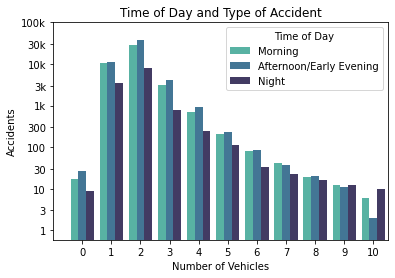

In [15]:
sb.countplot(data=accidents, x="n_vehicles", hue= "cyrcadian", palette="mako_r")
plt.xlim(-1,10.5)
plt.ylabel("Accidents")
plt.xlabel("Number of Vehicles")
plt.title("Time of Day and Type of Accident")
plt.legend(title= "Time of Day", labels=["Morning", "Afternoon/Early Evening", "Night"])
plt.yscale("log")
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels=["1", "3", "10", "30","100","300","1k","3k","10k", "30k", "100k"]
ax=plt.gca()
ax.set(yticks = ticks, yticklabels = labels)
plt.minorticks_off()
plt.xticks(np.arange(0,11,1),np.arange(0,11,1));

As I expected most of these two-car accidents happen in the early evening/afternoon and many others in the morning. It's also visible that Barcelona has a small but considerable number of big accidents (the ones with 3 or more vehicles involved in) happening also mostly in the evening.  

Now, what's the relationship between month and time of accident? 

In [16]:
#Making the month_name column an ordered categorical column
cat= ['Gener', 'Febrer', 'Març', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']
cl= pd.api.types.CategoricalDtype(categories=cat, ordered=True)
accidents["month_name"]= accidents.month_name.astype(cl)

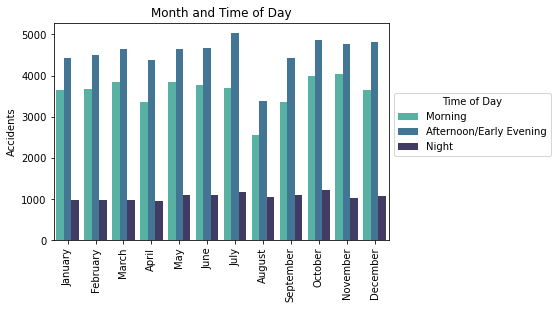

In [17]:
sb.countplot(data=accidents, x="month_name", hue="cyrcadian", palette="mako_r")
ticks=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks= np.arange(0,12,1), labels=ticks , rotation=90)
plt.legend(bbox_to_anchor=(1.5,0.7), title= "Time of Day", labels=["Morning", "Afternoon/Early Evening", "Night"])
plt.ylabel("Accidents")
plt.xlabel("")
plt.title("Month and Time of Day");

It seems that whatever time Barcelona is in, the afternoon always gets busier with accidents; with July having the most accidents in the evening. 

In which month and day do we notice most accidents?

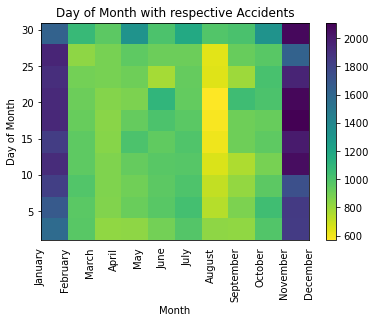

In [18]:
plt.hist2d(data=accidents, x="month", y="day", cmap="viridis_r")
plt.colorbar()
plt.xticks(np.arange(1,13,1), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],rotation=90)
plt.ylabel("Day of Month")
plt.xlabel("Month")
plt.title("Day of Month with respective Accidents")
plt.tick_params(bottom=False);

It seems to be the start and end of the year (January and December) that we notice most of the accidents to occur. Also interestingly, a peak of accidents at every end of almost each month (30th day or 29th).

Now, how about month vs hour? 

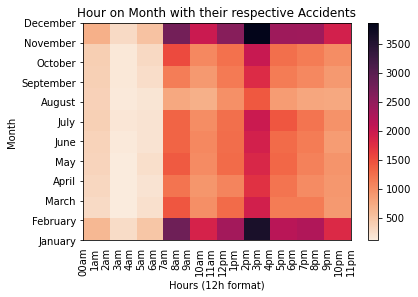

In [19]:
plt.hist2d(data=accidents, y="month", x="hour", cmap="rocket_r")
plt.colorbar()
plt.yticks(np.arange(1,13,1), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(np.arange(0,24,1), ["00am",  "1am",  "2am",  "3am",  "4am",  "5am",  "6am",  "7am",  "8am",  "9am", "10am", "11am", "12pm",  "1pm",  "2pm",  "3pm",  "4pm",  "5pm",  "6pm",  "7pm",  "8pm",  "9pm", "10pm", "11pm"], rotation=90)
plt.xlabel("Hours (12h format)")
plt.ylabel("Month")
plt.title("Hour on Month with their respective Accidents")
plt.tick_params(bottom=False);

Just as we saw before then, January and December seems to have many accidents and now we can see that in the afternoon (precisely at 3 pm) we notice many accidents. But there's no clear correlation to be noticed between month and hour of accidents.

How is the growth or fall of number of deaths,wounded and victims as the years passed?

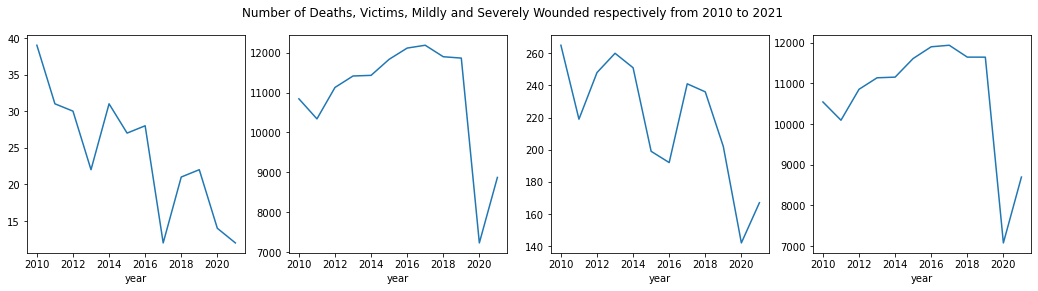

In [20]:
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4, figsize=(18,4))
accidents.groupby(by=["year"])["n_deaths"].sum().plot(ax=ax1)
accidents.groupby(by=["year"])["n_victims"].sum().plot(ax=ax2)
accidents.groupby(by=["year"])["n_wounded_severe"].sum().plot(ax=ax3)
accidents.groupby(by=["year"])["n_wounded_mild"].sum().plot(ax=ax4)
plt.suptitle("Number of Deaths, Victims, Mildly and Severely Wounded respectively from 2010 to 2021");

> The number of deaths seems to have been controlled by the officials as in 2010 to 2015, the number of deaths was high and from then there was a relatively a low number of deaths (although there was an impressive fall in 2017 and again a rise in 2018).  

> As for the number of victims, although the graph depicts a fall from 2019 to 2021, it might be due to the covid 19 restrictions that this number dropped; other than that, it should be a constant line through to the year 2021.

> Without the aforementioned covid 19 pandemic effects, for the number of wounded (both mild and severe), it's a constant. For the number of severely wounded, it's a constant rise and fall of around 200 per year. For the number of mildly wounded, it's a constant rise of around 11,000 per year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My features of intrerest were interesting on their own, but when I compared them with time features (like month, day and year), the result were even more interesting. The relationship between the number of vehicles involved in an accident and the time of day showed that on every day in the afternoon in Barcelona happens more accidents than in any other parrt of day. I also abserved a constant growth of victims and wounded people as time goes by; however, the number of deaths seems to be declining. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, the relationship between month and day surprised me with an interesting discovery: every end and start of month seems to be the busiest with accidents in Barcelona. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Do the number of deaths and number of vehicles involved in an accident in Barcelona vary depending on what time it is?

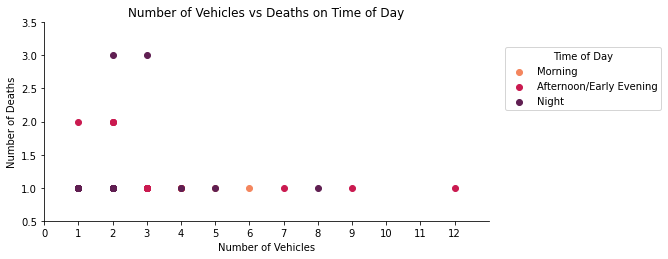

In [21]:
g= sb.FacetGrid(data=accidents, hue="cyrcadian", height=3.5, aspect=2, palette="rocket_r")
g.map(plt.scatter, "n_vehicles", "n_deaths")
plt.xticks(np.arange(0,13,1))
plt.ylim(0.5,3.5)
plt.xlim(0,13)
plt.legend()
plt.ylabel("Number of Deaths")
plt.xlabel("Number of Vehicles")
plt.title("Number of Vehicles vs Deaths on Time of Day")
plt.legend(bbox_to_anchor=(1.4,0.9), title= "Time of Day", labels=["Morning", "Afternoon/Early Evening", "Night"]);

It seems that it's at night that we notice fewer cars involved in an accident (which makes sense since at night there's less traffic). 

And interestingly, it's also at night that we observe many deaths in a single accident (I would guess probably be due to tiredness, darkness of the night or maybe drunkness).  

Next, do the seasons have an effect on why and when accidents happen in Barcelona? 

In [22]:
accidents.cause_incident.value_counts()

No és causa del  vianant           54523
Desconegut                         49462
Creuar per fora pas de vianants     2477
Desobeir el senyal del semàfor      2467
Altres                              1196
Transitar a peu per la calçada       493
Desobeir altres senyals               36
Name: cause_incident, dtype: int64

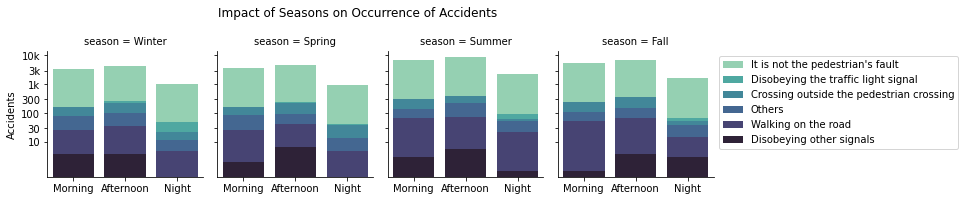

In [23]:
#Stopping the warnings from appearing
import warnings
warnings.filterwarnings('ignore')

# Making the season feature an ordered categorical feature
cat= ["Winter","Spring","Summer","Fall"]
cl= pd.api.types.CategoricalDtype(categories=cat, ordered=True)
accidents["season"] = accidents.season.astype(cl)

#Subsetting to remove "unknown" cause incidents
accidents_s = accidents.loc[accidents.cause_incident != "Desconegut"]
g= sb.FacetGrid(data=accidents_s, col="season", hue="cause_incident", palette="mako_r", aspect=0.85)
plt.suptitle("Impact of Seasons on Occurrence of Accidents")
g.map(sb.countplot, "cyrcadian")
plt.legend(bbox_to_anchor=(1,1) ,labels=['It is not the pedestrian\'s fault', 'Disobeying the traffic light signal', 'Crossing outside the pedestrian crossing', 'Others', 'Walking on the road', 'Disobeying other signals', 'Unknown'])
g.axes[0,0].set_ylabel("Accidents")
for i in np.arange(3):
    g.axes[0,i].set_xlabel("")
g.axes[0,0].set_xticks(np.arange(0,3,1), labels=["Morning", "Afternoon", "Night"])
plt.yscale("log")
plt.xlabel("")

ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels=["10", "30","100","300","1k","3k","10k"]
g.axes[0,0].set(yticks = ticks, yticklabels = labels)
plt.minorticks_off()

It seems to be that: yes, the seasons influence how and when an accident happen. Summer seems to have many accident causes than the other season; as always, "it's not the pedestrian's fault" being the most common in Barcelona.   

Now, do the seasons impact the number of deaths from accidents as years go by?

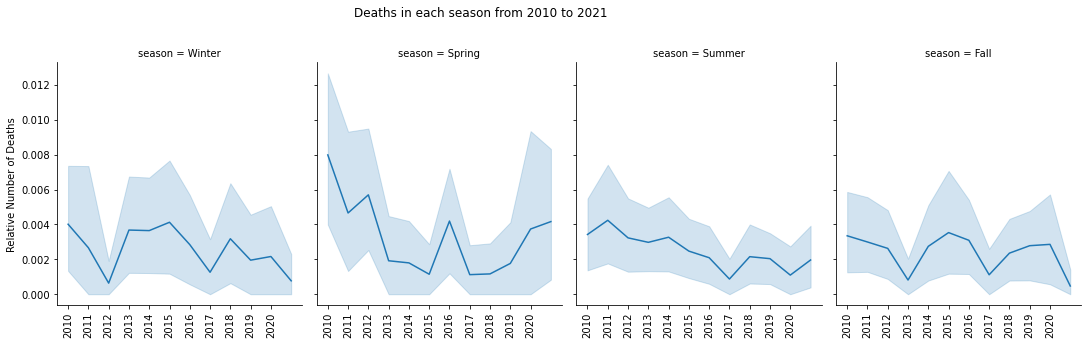

In [24]:
g= sb.FacetGrid(data=accidents, col="season", col_wrap=6, height=3, aspect=0.87, size=4.3, palette="mako")
g.map(sb.lineplot, "year", "n_deaths")
plt.suptitle("Deaths in each season from 2010 to 2021", x=0.3, y=1.10)
g.axes[0].set_ylabel("Relative Number of Deaths")
g.set(xticks = np.arange(2010,2021,1))
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
for i in np.arange(4):
    g.axes[i].set_xlabel("");

From this, I see that apart from the summer, all the seasons have relative constant rises and falls. The Spring comes forward as the first with the biggest relative number of deaths from accidents. 

And from these graphs, we would expect the fall to have an increased yearly number of accidents if the pattern is respected for the next 2 or 3 years. 

In [25]:
accidents["day_i"] = pd.to_datetime(accidents[['year', 'month', 'day']]).dt.dayofweek

In [26]:
accidents["died"]= pd.cut(x=accidents.n_deaths, bins=[0,0.9,10], include_lowest=True, labels=[1<0, 2>1], ordered=False).value_counts()
accidents["died"]= accidents.died.astype(bool)

What type of accidents do we observe in Barcelona in certain seasons and time of day?

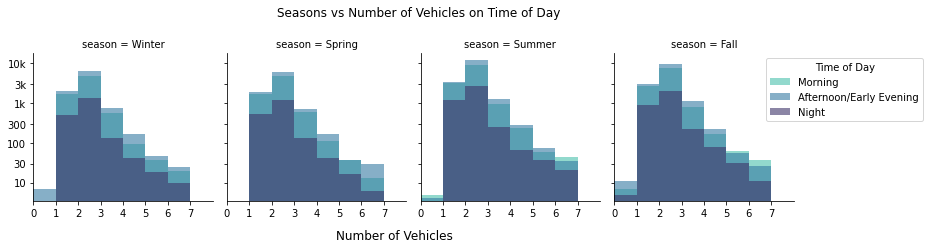

In [27]:
bins= np.arange(-1,8,1)
g= sb.FacetGrid(data=accidents,col="season", hue="cyrcadian", palette="mako_r", aspect=0.95)
g.map(plt.hist, "n_vehicles", bins=bins, alpha=0.6)
plt.xticks(np.arange(-1,8,1))
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.75,1), title= "Time of Day", labels=["Morning", "Afternoon/Early Evening", "Night"])
plt.xlim(0,8)
plt.suptitle("Seasons vs Number of Vehicles on Time of Day", x=0.53, y=1.1)
g.fig.supxlabel('Number of Vehicles')
for i in np.arange(4):
    g.axes[0,i].set_xlabel("");
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels=["10", "30","100","300","1k","3k","10k"]
g.axes[0,0].set(yticks = ticks, yticklabels = labels)
plt.minorticks_off();

Interestingly, during the Summer and the Fall, Barcelona can have up to car accidents involving 7 cars! 

And again, interestingly, it's at night that we observe big acccidents (accidents involving many cars)!

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at the number of vehicles involved in an accident and the season of year in question and the time of day ("cyrcadian") proved to be interesting.  Also, the relationship between the number of vehicles and the number of deaths in an accident was strengthened by the time of day to show me that it's at night that we observe many deaths of single car accidents! 

### Were there any interesting or surprising interactions between features?

> Yes, I was surprised when I brought in the cause of accidents with the season of year and the time of day ("cyrcadian"); Looking at the cause of accidents at the same time, I could which was the majority easily in this dataset.

## Conclusions

>Although this dataset was mostly of a categorical nature with not so many numerical variables to play with, it really packed with it important information and interesting discoveries. At the start, I did a little bit of wrangling mostly on my numerical variables, I did also some binning to get "season" and "weekend" features; I didn't need to change the form of my dataset as it was provided alresdy tidy. 

>On my discoveries, I have found along the way that whatever month or season Barcelona is in, most of the accidents were recorded in the afternoon (precisely at 3pm) with July recording the most of these accidents. I also saw that the spring records a somehow clear pattern of high number of deaths and that we can expect the pattern to continue in the coming year(s). I also noticed that, interestingly, every start and end of month is where most of the accidents get recorded. And I also found that it's at night that many deaths of a single accident and the same night time that we observe big accidents (involving sometimes up to 7 cars). 

>Lastly, I can't forget to mention that all these insights are relatively true since in this dataset, the last 2 years were recorded during the covid 19 pandemic.